# Física Aplicada à Computação

## Projeto Epoca de Finalistas

### Licenciatura em Engenharia Informática - Ano Lectivo 2022-2023

#### Fábio Gonçalves - 17646

#### João Portelinha - 20481

#### Docente: Nuno Pereira

##### Arduinos Nano 33 BLE Sense

Neste relatorio iremos apresentar as soluções para o Projeto de Epoca de Finalistas que nos foi proposto pelo docente da cadeira de Física Aplicada a Computação.

Os objetivos deste projeto eram os seguintes:
- Gerar dados de todos os sensores em ambos os Arduinos;
- Ler esses mesmos dados em Python;
- Calcular médias, desvio padrão, maximos e minimos;
- Visualizar em graficos usando o matplotlib;
- Gravar os dados num ficheiro em formato .json;
- Enviar esse mesmo ficheiro um para o outro por email atraves de Python;
- Apresentar os graficos numa pagina web.


### Importante
Começar por correr este bloco de codigo que irá iniciar os imports necessarios para o resto do relatorio e realizar a ligação ao arduino!

Necessario executar os seguintes comandos de instação de algumas *libraries*:
- pip install pyserial
- pip install matplotlib
- pip install numpy
- pip install PyGithub

In [42]:
import os
import serial
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import json
import mimetypes
import smtplib
import getpass
import webbrowser
from datetime import datetime
from email.message import EmailMessage
from github import Github

port = !python -m serial.tools.list_ports
print('Portas COM disponível:', port)
if (port[0] != "no ports found"):
      arduino = serial.Serial()
      arduino.port = 'COM5'
      arduino.baudrate = 9600
      arduino.timeout = 5
      print("Ligação ao Arduino Estabelecida na", arduino.port)  
else:
       print("Erro ao estabelecer ligação com o Arduino")


Portas COM disponível: ['COM1                ', 'COM5                ', '2 ports found']
Ligação ao Arduino Estabelecida na COM5


#### Aquisição de Dados
Será pedido ao utilizador o numero de iterações em forma de *input box*, depois disto irá adquirir os dados do arduino com o delay escolhido no codigo*

*IMPORTANTE: Escolher no código o tempo de delay entre aquisições. **Default=60**

In [52]:
iterations = int(input('Número de séries de aquisição: '))

arduino.open()

data = []
data.append("Hora Temperatura(°C) Humidade(%) Pressão(kPa) Proximidade Aceleração(G) Temperatura Efetiva Temperatura na Pele")
count = 0

print('A adquirir os dados...')

task = True

while task:
    
    line = str(arduino.readline())
    reading = line[2:-5]

    now = datetime.now()
    current_time = now.strftime("%H:%M")

    data.append(current_time + " " + reading)
    count +=1
    time.sleep(60) # ALTERAR O TEMPO DE DELAY ENTRE AQUISIÇÕES
    if (count == iterations):
        print("\nDados obtidos com sucesso.".format(iterations))
        task = False

arduino.close()

A adquirir os dados...

Dados obtidos com sucesso.


#### Manipulação dos Dados e Desenho dos Respetivos Gráficos
Nesta parte do trabalho, separamos os dados todos lidos do arduino para os seus *arrays* individuais, estes que iremos usar para o desenho dos gráficos.

Após esta separação, são desenhados todos os graficos utilizando o **matplotlib**.

Dados lidos com sucesso!


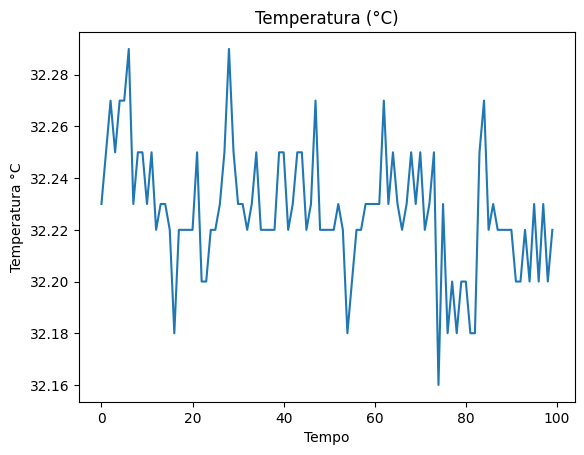

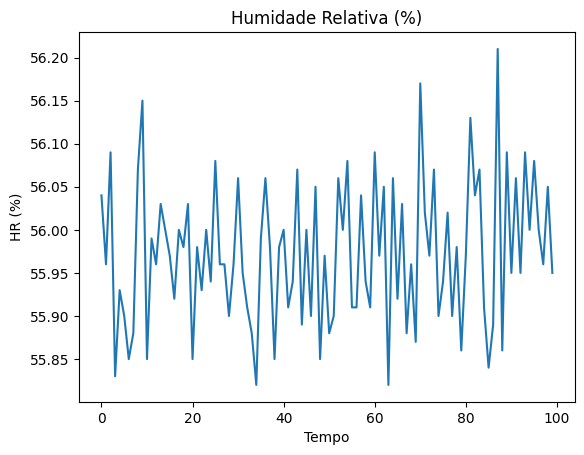

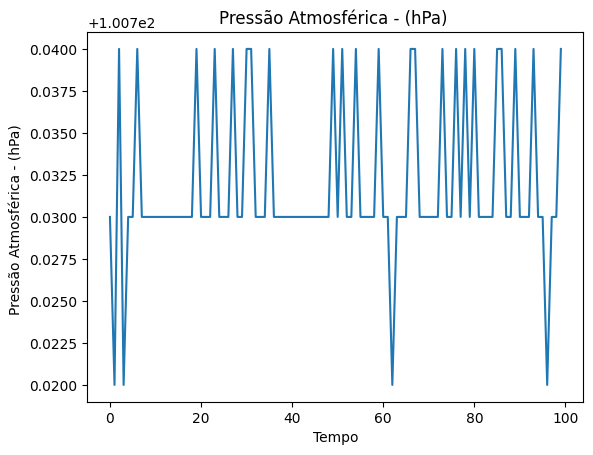

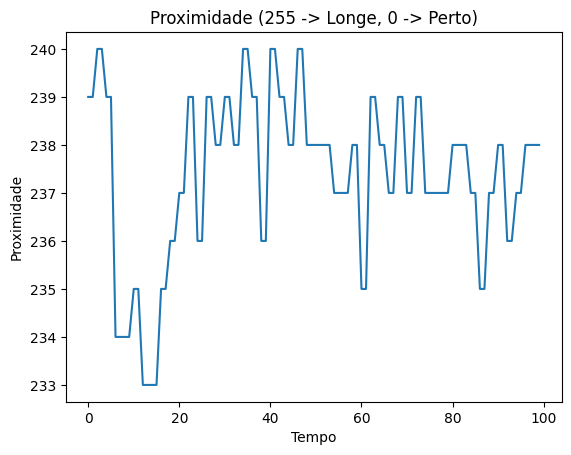

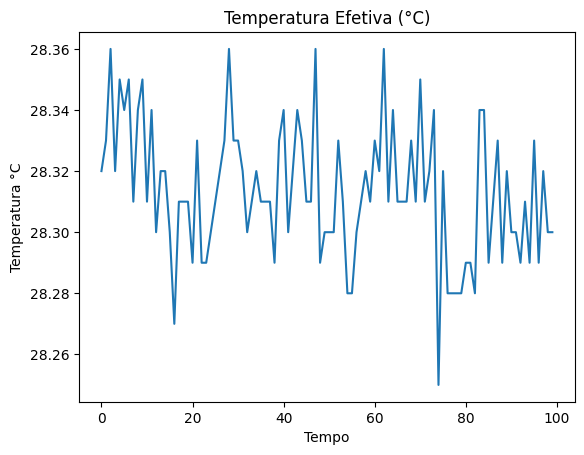

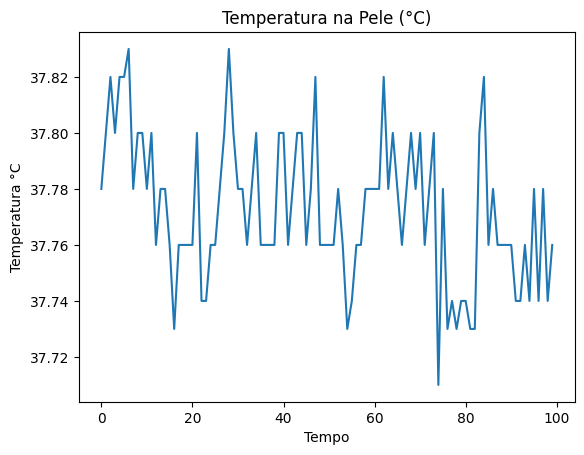

Text(0, 0.5, 'Acelearacao em Z')

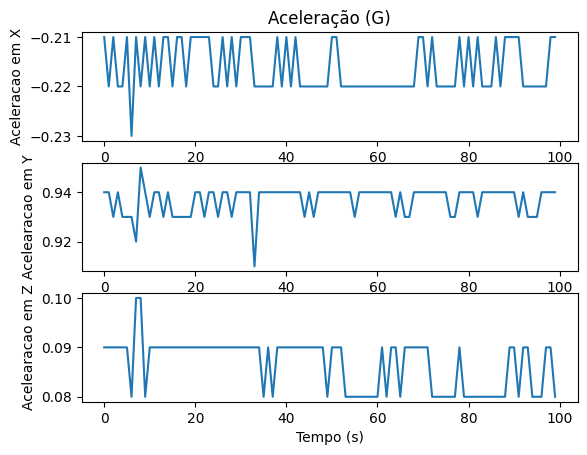

In [44]:
time_data = []
temp_data = []
hr_data = []
p_data  = []
prox_data = []
acc_data = []
x_acc = []
y_acc = []
z_acc = []
eff_temp = []
skin_temp = []

data = data[1:] # Skip primeira linha

for line in data:
    time, temp, hr, p, prox, acc, et, st = line.split()
    time_data.append(time)
    temp_data.append(float(temp))
    hr_data.append(float(hr))
    p_data.append(float(p))
    prox_data.append(float(prox))
    acc_data.append(acc)
    acc_string = acc.split(",")
    x_acc.append(float(acc_string[0]))
    y_acc.append(float(acc_string[1]))
    z_acc.append(float(acc_string[2]))
    eff_temp.append(float(et))
    skin_temp.append(float(st))

print("Dados lidos com sucesso!")

# Grafico da temperatura
plt.title('Temperatura (°C)')
plt.xlabel("Tempo")
plt.ylabel("Temperatura °C")
plt.plot(temp_data)
plt.show()

# Grafico da humidade
plt.title('Humidade Relativa (%)')
plt.xlabel("Tempo")
plt.ylabel("HR (%)")
plt.plot(hr_data)
plt.show()

# Grafico da Pressão Atmosferica
plt.title('Pressão Atmosférica - (hPa) ')
plt.xlabel("Tempo")
plt.ylabel("Pressão Atmosférica - (hPa) ")
plt.plot(p_data)
plt.show()

# Grafico de Proximidade
plt.title('Proximidade (255 -> Longe, 0 -> Perto)')
plt.xlabel("Tempo")
plt.ylabel("Proximidade")
plt.plot(prox_data)
plt.show()

# Grafico da temperatura efetiva
plt.title('Temperatura Efetiva (°C)')
plt.xlabel("Tempo")
plt.ylabel("Temperatura °C")
plt.plot(eff_temp)
plt.show()

# Grafico da temperatura na pele
plt.title('Temperatura na Pele (°C)')
plt.xlabel("Tempo")
plt.ylabel("Temperatura °C")
plt.plot(skin_temp)
plt.show()

# Grafico de Aceleração
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(x_acc)
plt.title('Aceleração (G)')
plt.ylabel('Aceleracao em X')

plt.subplot(3, 1, 2)
plt.plot(y_acc)
plt.xlabel('Tempo (s)')
plt.ylabel('Acelearacao em Y')

plt.subplot(3, 1, 3)
plt.plot(z_acc)
plt.xlabel('Tempo (s)')
plt.ylabel('Acelearacao em Z')


#### Calculos das Grandezas Básicas
Nesta parte do trabalho calculámos as grandezas básicas para cada tipo de dados recolhidos do Arduino que são as seguintes: Máximo, Mínimo, Média, Mediana e Desvio Padrão. 

In [45]:
# Calculo para as Grandezas da Temperatura
print("Grandezas Básicas de Temperatura")
print("Máximo = ", np.max(temp_data))
print("Mínimo = ", np.min(temp_data))
print("Média = ", np.average(temp_data))
print("Mediana = ", np.median(temp_data))
print("Desv. Padrão = ", np.std(temp_data), "\n")


# Calculo para as Grandezas de HR
print("Grandezas Básicas de HR(%)")
print("Máximo = ", np.max(hr_data))
print("Mínimo = ", np.min(hr_data))
print("Média = ", np.average(hr_data))
print("Mediana = ", np.median(hr_data))
print("Desv. Padrão = ", np.std(hr_data), "\n")

# Calculo para as Grandezas de P
print("Grandezas Básicas de P(hPa)")
print("Máximo = ", np.max(p_data))
print("Mínimo = ", np.min(p_data))
print("Média = ", np.average(p_data))
print("Mediana = ", np.median(p_data))
print("Desv. Padrão = ", np.std(p_data), "\n")

# Calculo para as Grandezas da Temperatura Efetiva
print("Grandezas Básicas de Temperatura Efetiva")
print("Máximo = ", np.max(eff_temp))
print("Mínimo = ", np.min(eff_temp))
print("Média = ", np.average(eff_temp))
print("Mediana = ", np.median(eff_temp))
print("Desv. Padrão = ", np.std(eff_temp), "\n")

# Calculo para as Grandezas na Pele
print("Grandezas Básicas de Temperatura na Pele")
print("Máximo = ", np.max(skin_temp))
print("Mínimo = ", np.min(skin_temp))
print("Média = ", np.average(skin_temp))
print("Mediana = ", np.median(skin_temp))
print("Desv. Padrão = ", np.std(skin_temp), "\n")

Grandezas Básicas de Temperatura
Máximo =  32.29
Mínimo =  32.16
Média =  32.22709999999999
Mediana =  32.23
Desv. Padrão =  0.023676781875922318 

Grandezas Básicas de HR(%)
Máximo =  56.21
Mínimo =  55.82
Média =  55.972600000000014
Mediana =  55.97
Desv. Padrão =  0.08279637673231871 

Grandezas Básicas de P(hPa)
Máximo =  100.74
Mínimo =  100.72
Média =  100.73189999999998
Mediana =  100.73
Desv. Padrão =  0.004836320915734499 

Grandezas Básicas de Temperatura Efetiva
Máximo =  28.36
Mínimo =  28.25
Média =  28.313300000000005
Mediana =  28.31
Desv. Padrão =  0.02172809241511998 

Grandezas Básicas de Temperatura na Pele
Máximo =  37.83
Mínimo =  37.71
Média =  37.7727
Mediana =  37.78
Desv. Padrão =  0.025762569747600685 



#### Criação do ficheiro .JSON
Nesta parte do trabalho tratamos do ficheiro .json. Começámos por definir as categorias do ficheiro e depois a categorizar os dados de modo a atribuir as suas respetivas categorias.

Por fim juntamos toda esta informação com a data e hora currente e escrevemos no ficheiro .json.

In [54]:
dir_path = os.getcwd()

# Definir as categorias dos dados para o .json
categories = [
    'tempo',
    'temperatura',
    'humidade',
    'pressao',
    'proximidade',
    'acel_x',
    'acel_y',
    'acel_z',
    'temperatura_efetiva',
    'temperatura_na_pele'
]

# Inicializar um dicionário para armazenar os dados categorizados
categorized_data = {category: [] for category in categories}
# Adicionar os dados às respetivas categorias
categorized_data[categories[0]].extend(time_data)
categorized_data[categories[1]].extend(temp_data)
categorized_data[categories[2]].extend(hr_data)
categorized_data[categories[3]].extend(p_data)
categorized_data[categories[4]].extend(prox_data)
categorized_data[categories[5]].extend(x_acc)
categorized_data[categories[6]].extend(y_acc)
categorized_data[categories[7]].extend(z_acc)
categorized_data[categories[8]].extend(eff_temp)
categorized_data[categories[9]].extend(skin_temp)

# Data e hora atuais e combinar com os dados categorizados
current_datetime = datetime.now().strftime("%d-%m-%Y %H:%M:%S")
combined_data = {"timestamp": current_datetime, **categorized_data}

# Definição do caminho do ficheiro de output
output_file_path = "output.json"

# Escrever os dados categorizados no ficheiro
with open(output_file_path, 'w') as file:
    json.dump(combined_data, file, indent=2)

#### Criação e envio do email contendo o ficheiro .JSON em anexo

In [6]:
#https://pythoncircle.com/post/719/sending-email-with-attachments-using-python-built-in-email-module/
message = EmailMessage()
sender = "20481@stu.ipbeja.pt"
recipient = "17646@stu.ipbeja.pt"
message['From'] = sender
message['To'] = recipient
message['Subject'] = 'Dados Arduino do João'
body = "Ficheiro em anexo .json com dados do Arduino"
message.set_content(body)

attachment_path = os.path.join(dir_path, 'output.json')
attachment_filename = os.path.basename(attachment_path)

mime_type, _ = mimetypes.guess_type(attachment_path)
mime_type, mime_subtype = mime_type.split('/', 1)

with open(attachment_path, 'rb') as ap:
    message.add_attachment(ap.read(),
                           maintype=mime_type,
                           subtype=mime_subtype,
                           filename=attachment_filename)

smtp_server = 'smtp.office365.com'
smtp_port = 587
password = getpass.getpass('Password? ')

with smtplib.SMTP(smtp_server, smtp_port) as server:
    server.starttls()
    server.login(sender, password)
    server.send_message(message)

#### Commit e push dos ficheiros para o site


In [48]:
token = input("Token") #https://github.com/settings/tokens

g = Github(token)

repo = g.get_repo("joao-portelinha/Projeto-FAC")
all_files = []
contents = repo.get_contents("")
while contents:
    file_content = contents.pop(0)
    if file_content.type == "dir":
        contents.extend(repo.get_contents(file_content.path))
    else:
        file = file_content
        all_files.append(str(file).replace('ContentFile(path="','').replace('")',''))

with open('output.json', 'r') as file_local:
    content_local = file_local.read()

with open('output_remote.json', 'r') as file_remote:
    content_remote = file_remote.read()

# Upload to github
git_prefix = 'docs/'
git_file_local = git_prefix + 'output.json'
git_file_remote = git_prefix + 'output_remote.json'
if git_file_local and git_file_remote in all_files:
    contents = repo.get_contents(git_file_local)
    repo.update_file(contents.path, "committing files", content_local, contents.sha, branch="main")
    contents = repo.get_contents(git_file_remote)
    repo.update_file(contents.path, "committing files", content_remote, contents.sha, branch="main")
    print(git_file_local + " " + git_file_remote + ' UPDATED')
else:
    repo.create_file(git_file_local, "committing files", content_local, branch="main")
    repo.create_file(git_file_remote, "committing files", content_remote, branch="main")
    print(git_file_local + " " + git_file_remote + ' CREATED')

# Open website

webbrowser.open('https://joao-portelinha.github.io/Projeto-FAC/repo.html')

docs/output.json docs/output_remote.json UPDATED


True